In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv("Books_summary.csv")

In [3]:
df1.head()

,Book_name,Summary
0,\n Gone Girl\n,Marriage can be a real killer.On a warm summer...
1,\n The Power of One\n,"In 1939, as Hitler casts his enormous, cruel s..."
2,\n The Lace Reader\n,Look into the lace... When the eyes begin to f...
3,\n I Capture the Castle\n,"Through six turbulent months of 1934, 17-year-..."
4,\n The Westing Game\n,A bizarre chain of events begins when sixteen ...


In [4]:
df1

,Book_name,Summary
0,\n Gone Girl\n,Marriage can be a real killer.On a warm summer...
1,\n The Power of One\n,"In 1939, as Hitler casts his enormous, cruel s..."
2,\n The Lace Reader\n,Look into the lace... When the eyes begin to f...
3,\n I Capture the Castle\n,"Through six turbulent months of 1934, 17-year-..."
4,\n The Westing Game\n,A bizarre chain of events begins when sixteen ...
5,\n The Electric Kool-Aid Acid Test\n,Tom Wolfe's much-discussed kaleidoscopic non-f...
6,\n A Visit from the Goon Squad\n,Jennifer Egan’s spellbinding interlocking narr...
7,\n Fall on Your Knees\n,They are the Pipers of Cape Breton Island — a ...
8,\n Coin Locker Babies\n,A surreal coming-of-age tale that establishes ...
9,\n The Alienist\n,"Length: 20 hrs and 3 mins The year is 1896, th..."


In [5]:
df1.replace('\n',' ', regex=True,inplace = True)


In [6]:
df1

,Book_name,Summary
0,Gone Girl,Marriage can be a real killer.On a warm summer...
1,The Power of One,"In 1939, as Hitler casts his enormous, cruel s..."
2,The Lace Reader,Look into the lace... When the eyes begin to f...
3,I Capture the Castle,"Through six turbulent months of 1934, 17-year-..."
4,The Westing Game,A bizarre chain of events begins when sixteen ...
5,The Electric Kool-Aid Acid Test,Tom Wolfe's much-discussed kaleidoscopic non-f...
6,A Visit from the Goon Squad,Jennifer Egan’s spellbinding interlocking narr...
7,Fall on Your Knees,They are the Pipers of Cape Breton Island — a ...
8,Coin Locker Babies,A surreal coming-of-age tale that establishes ...
9,The Alienist,"Length: 20 hrs and 3 mins The year is 1896, th..."


In [7]:
df1.Summary.unique()

array(["Marriage can be a real killer.On a warm summer morning in North Carthage, Missouri, it is Nick and Amy Dunne’s fifth wedding anniversary. Presents are being wrapped and reservations are being made when Nick’s clever and beautiful wife disappears from their rented McMansion on the Mississippi River. Husband-of-the-Year Nick isn’t doing himself any favors with cringe-worthy daydreams about the slope and shape of his wife’s head, but passages from Amy's diary reveal the alpha-girl perfectionist could have put anyone dangerously on edge. Under mounting pressure from the police and the media—as well as Amy’s fiercely doting parents—the town golden boy parades an endless series of lies, deceits, and inappropriate behavior. Nick is oddly evasive, and he’s definitely bitter—but is he really a killer?As the cops close in, every couple in town is soon wondering how well they know the one that they love. With his twin sister, Margo, at his side, Nick stands by his innocence. Trouble is, i

# Step 1: Data Cleaning


In [8]:
# cleaning the summary

In [9]:
import re
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
df1['Cleaned Summary'] = df1['Summary'].apply(clean)
df1.head()

,Book_name,Summary,Cleaned Summary
0,Gone Girl,Marriage can be a real killer.On a warm summer...,Marriage can be a real killer On a warm summer...
1,The Power of One,"In 1939, as Hitler casts his enormous, cruel s...",In as Hitler casts his enormous cruel shadow a...
2,The Lace Reader,Look into the lace... When the eyes begin to f...,Look into the lace When the eyes begin to fill...
3,I Capture the Castle,"Through six turbulent months of 1934, 17-year-...",Through six turbulent months of year old Cassa...
4,The Westing Game,A bizarre chain of events begins when sixteen ...,A bizarre chain of events begins when sixteen ...


# Step 2: Tokenization
Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

# Step 3: Enrichment – POS tagging
Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

# Step 4: Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language. 

### Step 2 to step 4 performed in below code lines

In [10]:
import nltk
nltk.download("punkt")
nltk.download("omw-1.4")
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download("stopwords")
from nltk.corpus import stopwords
nltk.download("wordnet")
from nltk.corpus import wordnet

# pos tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df1['POS tagged'] = df1['Cleaned Summary'].apply(token_stop_pos)
df1.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shrad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shrad\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shrad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Book_name,Summary,Cleaned Summary,POS tagged
0,Gone Girl,Marriage can be a real killer.On a warm summer...,Marriage can be a real killer On a warm summer...,"[(Marriage, n), (real, a), (killer, n), (warm,..."
1,The Power of One,"In 1939, as Hitler casts his enormous, cruel s...",In as Hitler casts his enormous cruel shadow a...,"[(Hitler, n), (casts, v), (enormous, a), (crue..."
2,The Lace Reader,Look into the lace... When the eyes begin to f...,Look into the lace When the eyes begin to fill...,"[(Look, v), (lace, n), (eyes, n), (begin, v), ..."
3,I Capture the Castle,"Through six turbulent months of 1934, 17-year-...",Through six turbulent months of year old Cassa...,"[(six, None), (turbulent, a), (months, n), (ye..."
4,The Westing Game,A bizarre chain of events begins when sixteen ...,A bizarre chain of events begins when sixteen ...,"[(bizarre, a), (chain, n), (events, n), (begin..."


In [11]:
df1['POS tagged']

0     [(Marriage, n), (real, a), (killer, n), (warm,...
1     [(Hitler, n), (casts, v), (enormous, a), (crue...
2     [(Look, v), (lace, n), (eyes, n), (begin, v), ...
3     [(six, None), (turbulent, a), (months, n), (ye...
4     [(bizarre, a), (chain, n), (events, n), (begin...
5     [(Tom, n), (Wolfe, n), (much, r), (discussed, ...
6     [(Jennifer, n), (Egan, n), (spellbinding, v), ...
7     [(Pipers, n), (Cape, n), (Breton, n), (Island,...
8     [(surreal, a), (coming, n), (age, n), (tale, n...
9     [(Length, n), (hrs, n), (mins, v), (year, n), ...
10    [(Harry, n), (Potter, n), (life, n), (miserabl...
Name: POS tagged, dtype: object

# Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.


In [12]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df1['Lemma'] = df1['POS tagged'].apply(lemmatize)
df1.head()

,Book_name,Summary,Cleaned Summary,POS tagged,Lemma
0,Gone Girl,Marriage can be a real killer.On a warm summer...,Marriage can be a real killer On a warm summer...,"[(Marriage, n), (real, a), (killer, n), (warm,...",Marriage real killer warm summer morning Nor...
1,The Power of One,"In 1939, as Hitler casts his enormous, cruel s...",In as Hitler casts his enormous cruel shadow a...,"[(Hitler, n), (casts, v), (enormous, a), (crue...",Hitler cast enormous cruel shadow across wor...
2,The Lace Reader,Look into the lace... When the eyes begin to f...,Look into the lace When the eyes begin to fill...,"[(Look, v), (lace, n), (eyes, n), (begin, v), ...",Look lace eye begin fill tear patience long ...
3,I Capture the Castle,"Through six turbulent months of 1934, 17-year-...",Through six turbulent months of year old Cassa...,"[(six, None), (turbulent, a), (months, n), (ye...",six turbulent month year old Cassandra Mortm...
4,The Westing Game,A bizarre chain of events begins when sixteen ...,A bizarre chain of events begins when sixteen ...,"[(bizarre, a), (chain, n), (events, n), (begin...",bizarre chain event begin sixteen unlikely p...


In [13]:
df1['Lemma'][0]

'  Marriage real killer warm summer morning North Carthage Missouri Nick Amy Dunne fifth wedding anniversary Presents wrap reservation make Nick clever beautiful wife disappears rent McMansion Mississippi River Husband Year Nick favor cringe worthy daydream slope shape wife head passage Amy diary reveal alpha girl perfectionist could put anyone dangerously edge mount pressure police medium well Amy fiercely dot parent town golden boy parade endless series lie deceit inappropriate behavior Nick oddly evasive definitely bitter really killer cop close every couple town soon wonder well know one love twin sister Margo side Nick stand innocence Trouble Nick beautiful wife silvery gift box hidden back bedroom closet razor sharp writing trademark psychological insight Gillian Flynn deliver fast pace devilishly dark ingeniously plot thriller confirm status one hot writer around One critically acclaimed suspense writer time New York Times bestseller Gillian Flynn take statement dark place unput

In [14]:
df1[['Summary','Lemma']]

,Summary,Lemma
0,Marriage can be a real killer.On a warm summer...,Marriage real killer warm summer morning Nor...
1,"In 1939, as Hitler casts his enormous, cruel s...",Hitler cast enormous cruel shadow across wor...
2,Look into the lace... When the eyes begin to f...,Look lace eye begin fill tear patience long ...
3,"Through six turbulent months of 1934, 17-year-...",six turbulent month year old Cassandra Mortm...
4,A bizarre chain of events begins when sixteen ...,bizarre chain event begin sixteen unlikely p...
5,Tom Wolfe's much-discussed kaleidoscopic non-f...,Tom Wolfe much discuss kaleidoscopic non fic...
6,Jennifer Egan’s spellbinding interlocking narr...,Jennifer Egan spellbind interlock narrative ...
7,They are the Pipers of Cape Breton Island — a ...,Pipers Cape Breton Island family steep lie u...
8,A surreal coming-of-age tale that establishes ...,surreal coming age tale establish Ryu Muraka...
9,"Length: 20 hrs and 3 mins The year is 1896, th...",Length hr mins year place New York City cold...


## Wordcloud
A word cloud (also known as a tag cloud) is a visual representation of words. Cloud creators are used to highlight popular words and phrases based on frequency and relevance

There are 7912 words in the combination of all cells in column Lemma.


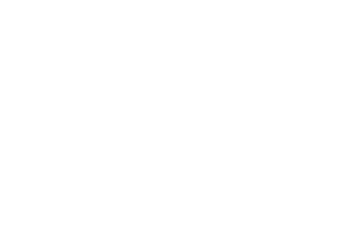

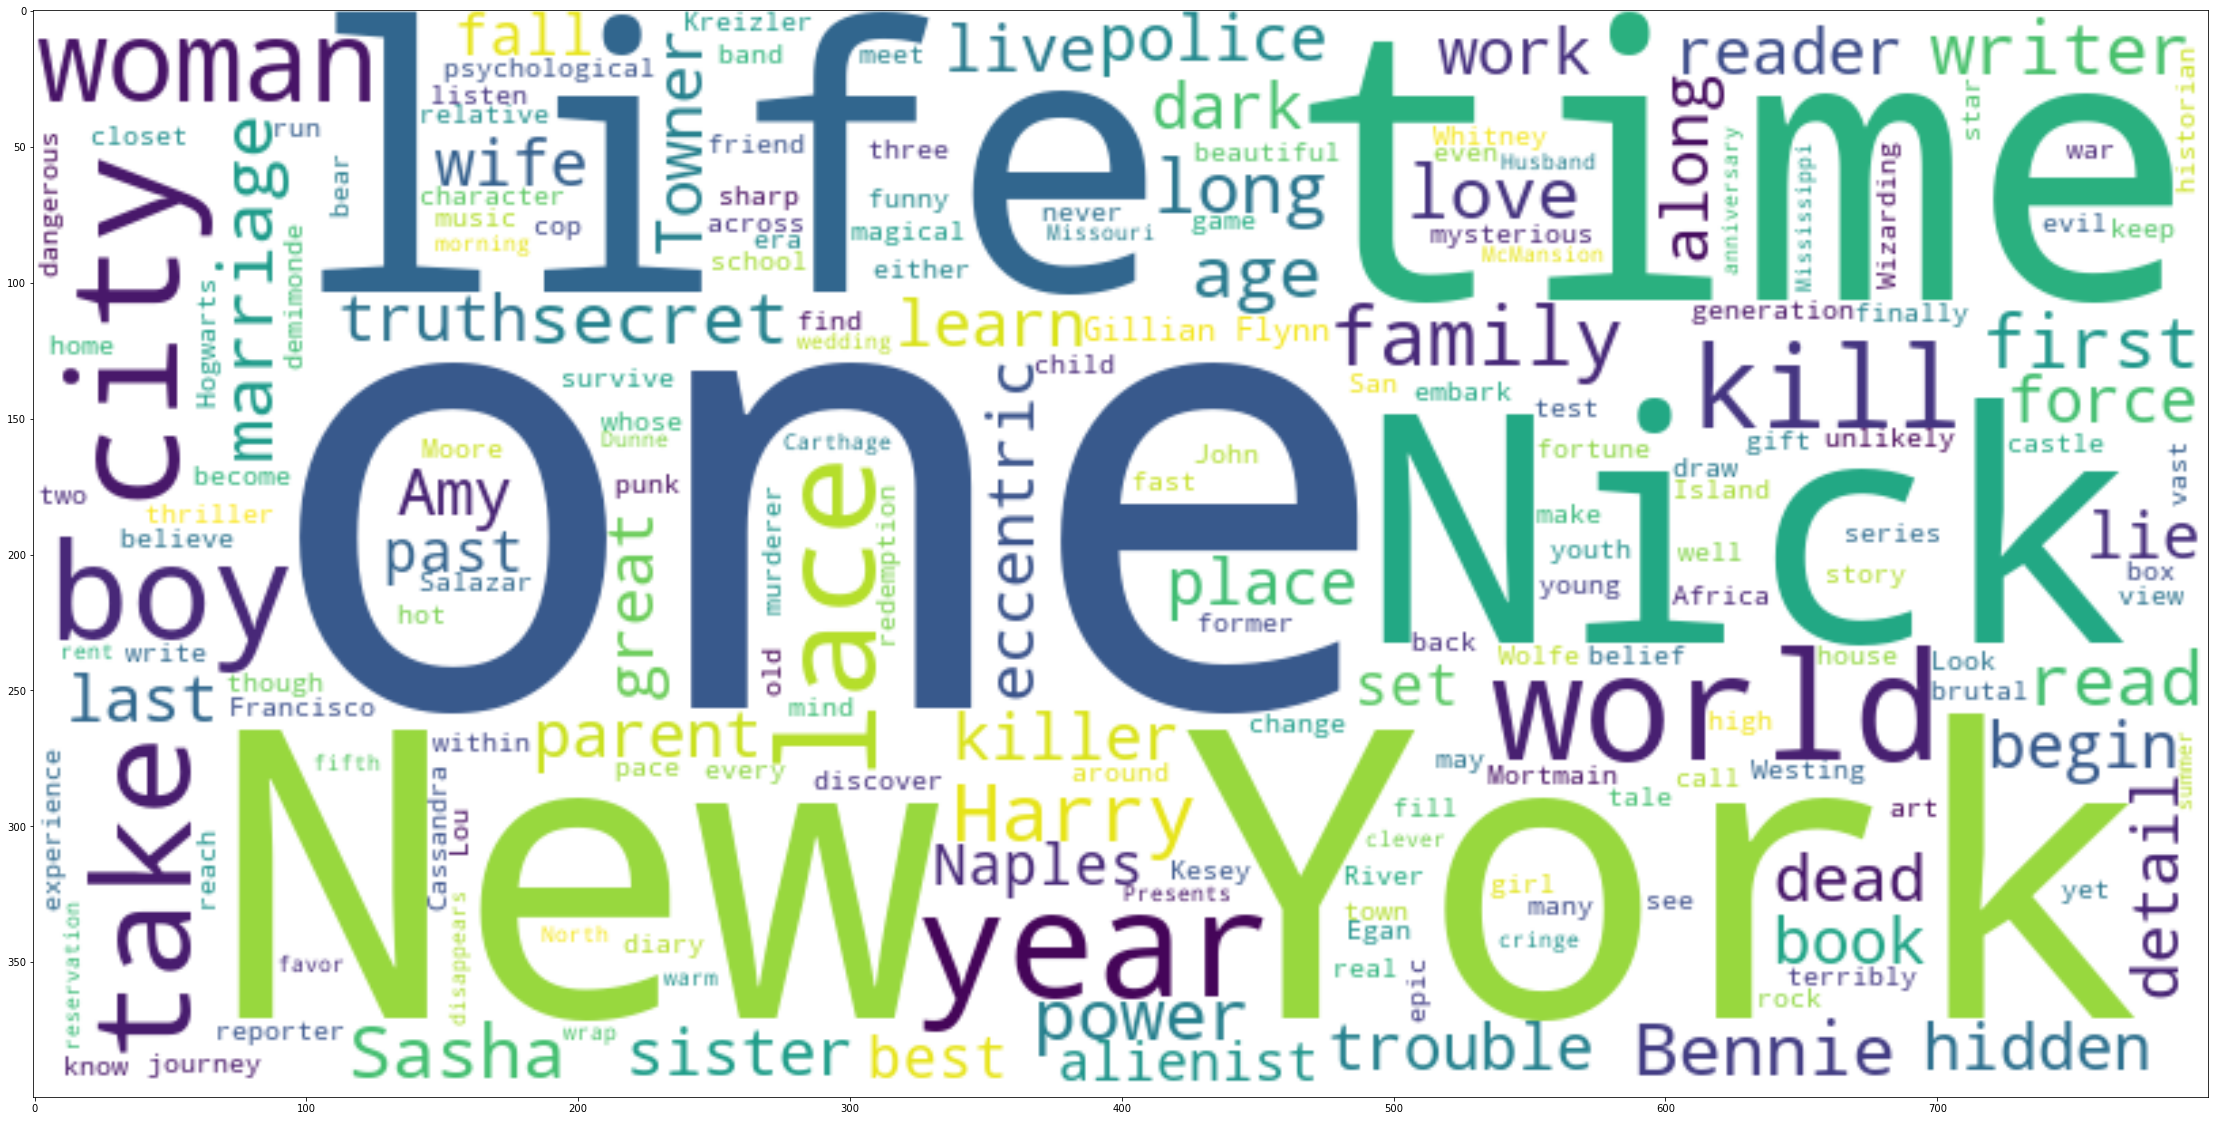

In [15]:

from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import seaborn as sns

text = " ".join(r for r in df1.Lemma.astype(str))
print ("There are {} words in the combination of all cells in column Lemma.".format(len(text)))



# Generate a word cloud image

wordcloud = WordCloud( background_color="white", width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:

plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

## negative words

In [16]:
with open("negative-words.txt","r", encoding='latin-1') as neg:
    negwords = neg.read().split("\n")

## positive words

In [17]:
with open("positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")

## Vectorization

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
text_tf = tf.fit_transform(df1['Cleaned Summary'])
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
summary_df =pd.DataFrame(denselist, columns=feature_names)
summary_df.head()

C:\Users\shrad\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandoned,abandonment,ability,about,acclaimed,acid,across,actually,addiction,adjacent,...,wrong,year,yearnings,years,yet,york,you,young,your,youth
0,0.0,0.000000,0.0,0.061770,0.050925,0.0,0.000000,0.000000,0.050925,0.0,...,0.050925,0.030885,0.0,0.0,0.000000,0.030885,0.130587,0.0,0.00000,0.0
1,0.0,0.119547,0.0,0.000000,0.000000,0.0,0.102185,0.119547,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.102185,0.000000,0.000000,0.0,0.00000,0.0
2,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.039528,0.055710,0.0,0.05571,0.0
3,0.0,0.000000,0.0,0.089367,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.089367,0.0,0.0,0.125952,0.000000,0.000000,0.0,0.00000,0.0
4,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0


In [19]:
#plotting wordcloud on TFIDF
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = ' '.join(summary_df)

## Wordcloud for positive words

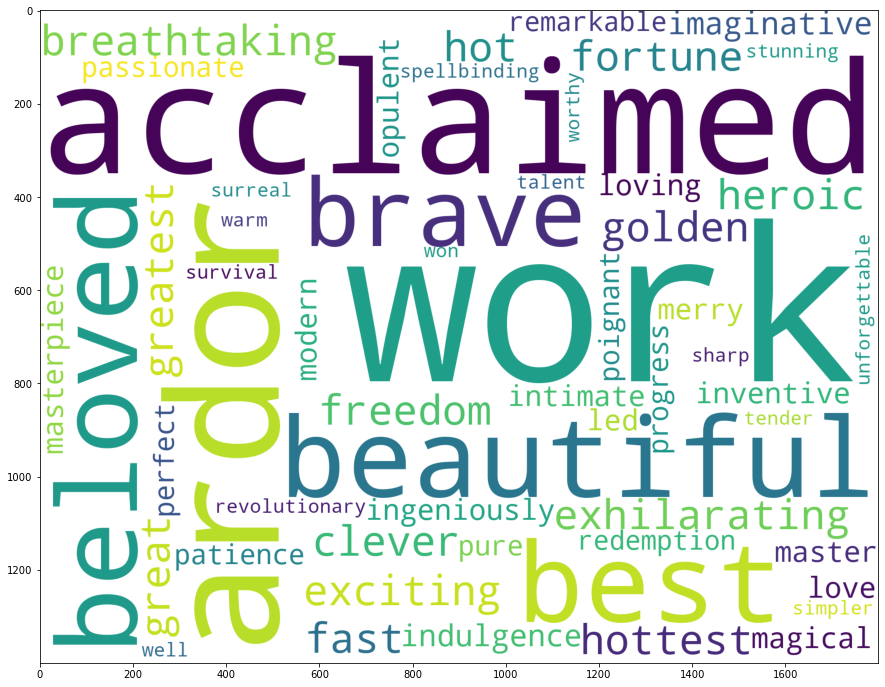

In [20]:
f, axes = plt.subplots(figsize=(20,12))
pos_words = ' '.join([w for w in summary_df if w in poswords])

cloud_pos = WordCloud(
        background_color = 'white',
        width =1800,
        height=1400).generate(pos_words)
plt.imshow(cloud_pos)

## Wordcloud for Negative words

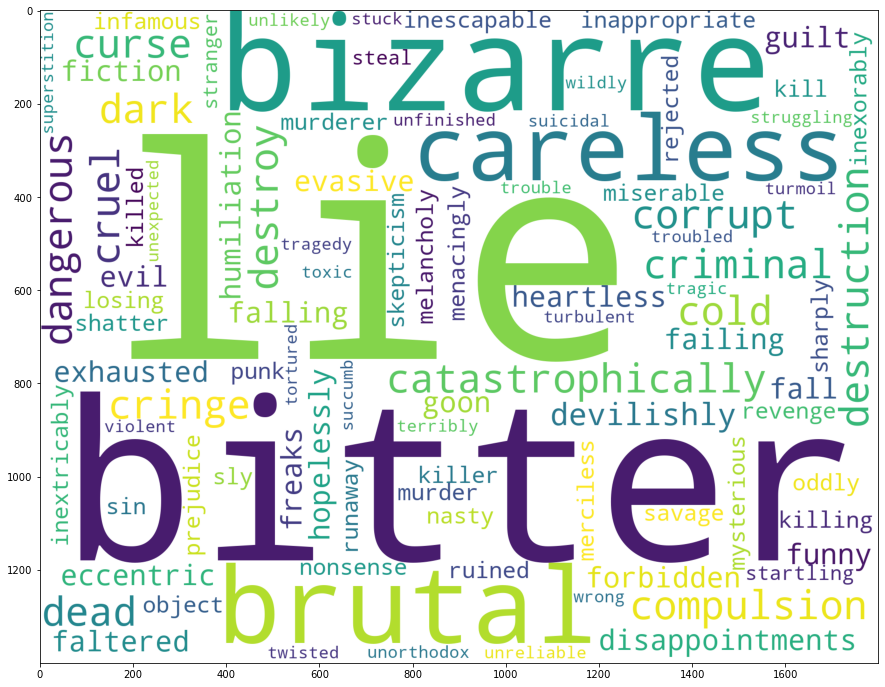

In [21]:
f, axes = plt.subplots(figsize=(20,12))
neg_words = ' '.join([w for w in summary_df if w in negwords])

cloud_neg = WordCloud(
        background_color='white',
        width =1800,
        height =1400).generate(neg_words)
plt.imshow(cloud_neg)

## Model Building

# Sentiment Analysis using TextBlob:
TextBlob is a Python library for processing textual data. It provides a consistent API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, and more.

The two measures that are used to analyze the sentiment are:

Polarity – talks about how positive or negative the opinion is
Subjectivity – talks about how subjective the opinion is
TextBlob(text).sentiment gives us the Polarity, Subjectivity values.
Polarity ranges from -1 to 1 (1 is more positive, 0 is neutral, -1 is more negative)
Subjectivity ranges from 0 to 1(0 being very objective and 1 being very subjective)

In [22]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(Summary):
    return TextBlob(Summary).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(Summary):
    return TextBlob(Summary).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'positive'

In [23]:
fin_data = pd.DataFrame(df1[['Book_name','Summary', 'Lemma']])

In [24]:
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data

,Book_name,Summary,Lemma,Polarity,Analysis
0,Gone Girl,Marriage can be a real killer.On a warm summer...,Marriage real killer warm summer morning Nor...,8.523600e-02,positive
1,The Power of One,"In 1939, as Hitler casts his enormous, cruel s...",Hitler cast enormous cruel shadow across wor...,-4.625929e-18,Negative
2,The Lace Reader,Look into the lace... When the eyes begin to f...,Look lace eye begin fill tear patience long ...,1.893357e-01,positive
3,I Capture the Castle,"Through six turbulent months of 1934, 17-year-...",six turbulent month year old Cassandra Mortm...,1.500000e-01,positive
4,The Westing Game,A bizarre chain of events begins when sixteen ...,bizarre chain event begin sixteen unlikely p...,-9.090909e-03,Negative
5,The Electric Kool-Aid Acid Test,Tom Wolfe's much-discussed kaleidoscopic non-f...,Tom Wolfe much discuss kaleidoscopic non fic...,1.727273e-01,positive
6,A Visit from the Goon Squad,Jennifer Egan’s spellbinding interlocking narr...,Jennifer Egan spellbind interlock narrative ...,1.496786e-03,positive
7,Fall on Your Knees,They are the Pipers of Cape Breton Island — a ...,Pipers Cape Breton Island family steep lie u...,4.886364e-02,positive
8,Coin Locker Babies,A surreal coming-of-age tale that establishes ...,surreal coming age tale establish Ryu Muraka...,2.115385e-02,positive
9,The Alienist,"Length: 20 hrs and 3 mins The year is 1896, th...",Length hr mins year place New York City cold...,-1.243273e-01,Negative


In [25]:
tb_counts = fin_data.Analysis.value_counts()

tb_counts

positive    8
Negative    3
Name: Analysis, dtype: int64

# Sentiment Analysis using VADER
VADER stands for Valence Aware Dictionary and Sentiment Reasoner. Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

##### The sum of pos, neg, neu intensities give 1. Compound ranges from -1 to 1 and is the metric used to draw the overall sentiment.
##### positive if compound >= 0.5
##### neutral if -0.5 < compound < 0.5
##### negative if -0.5 >= compound

In [26]:
! pip install vaderSentiment

In [27]:
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# # function to print sentiments
# # of the sentence.
# global out
# def sentiment_scores(sentence):
# # Create a SentimentIntensityAnalyzer object.
#     sid_obj = SentimentIntensityAnalyzer()
# # polarity_scores method of SentimentIntensityAnalyzer
# # oject gives a sentiment dictionary.
# # which contains pos, neg, neu, and compound scores.
#     sentiment_dict = sid_obj.polarity_scores(sentence)
#     print("Overall sentiment dictionary is : ", sentiment_dict)
#     print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
#     print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
#     print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
#     #print("Sentence Overall Rated As", end = " ")
#     #decide sentiment as positive, negative and neutral
# # def analysis(score):
# #     if sentiment_dict['compound'] >= 0.05 :
# #         print("Positive")
# #     elif sentiment_dict['compound'] <= - 0.05 :
# #         print("Negative")
# #     else :
# #         print("Neutral")
 
# def result(compound):
#     if sentiment_dict['compound'] >= 0.05 :
#         A="Positive"
#         out = print(A)
#         out = A
#     elif sentiment_dict['compound'] <= -0.05 :
#         B = "Negative"
#         print(B)
#         out = B
#     else :
#         C = "Neutral"
#         print(C)
#         out = C
# print("Sentence Overall Rated As {}".format(out))  
        

In [28]:
# fin_data['score_Vader']=fin_data['Lemma'].apply(sentiment_scores)
# fin_data['output'] = out
# fin_data

In [29]:
 from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 analyzer = SentimentIntensityAnalyzer()
 # function to calculate vader sentiment

 def vadersentimentanalysis(Summary):
    vs = analyzer.polarity_scores(Summary)
    print("Overall sentiment dictionary is : ", vs)
    print("sentence was rated as ", vs['neg']*100, "% Negative")
    print("sentence was rated as ", vs['neu']*100, "% Neutral")
    print("sentence was rated as ", vs['pos']*100, "% Positive")
    return vs['compound']
     
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
         return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
    
fin_data['Vader_compound'] = fin_data['Lemma'].apply(vadersentimentanalysis)
fin_data['Vader Analysis'] = fin_data['Vader_compound'].apply(vader_analysis)
fin_data

Overall sentiment dictionary is :  {'neg': 0.171, 'neu': 0.626, 'pos': 0.203, 'compound': 0.5868}
sentence was rated as  17.1 % Negative
sentence was rated as  62.6 % Neutral
sentence was rated as  20.3 % Positive
Overall sentiment dictionary is :  {'neg': 0.233, 'neu': 0.676, 'pos': 0.09, 'compound': -0.8718}
sentence was rated as  23.3 % Negative
sentence was rated as  67.60000000000001 % Neutral
sentence was rated as  9.0 % Positive
Overall sentiment dictionary is :  {'neg': 0.171, 'neu': 0.717, 'pos': 0.112, 'compound': -0.8217}
sentence was rated as  17.1 % Negative
sentence was rated as  71.7 % Neutral
sentence was rated as  11.200000000000001 % Positive
Overall sentiment dictionary is :  {'neg': 0.144, 'neu': 0.63, 'pos': 0.226, 'compound': 0.6352}
sentence was rated as  14.399999999999999 % Negative
sentence was rated as  63.0 % Neutral
sentence was rated as  22.6 % Positive
Overall sentiment dictionary is :  {'neg': 0.247, 'neu': 0.589, 'pos': 0.164, 'compound': -0.6705}
sente

,Book_name,Summary,Lemma,Polarity,Analysis,Vader_compound,Vader Analysis
0,Gone Girl,Marriage can be a real killer.On a warm summer...,Marriage real killer warm summer morning Nor...,8.523600e-02,positive,0.5868,Positive
1,The Power of One,"In 1939, as Hitler casts his enormous, cruel s...",Hitler cast enormous cruel shadow across wor...,-4.625929e-18,Negative,-0.8718,Negative
2,The Lace Reader,Look into the lace... When the eyes begin to f...,Look lace eye begin fill tear patience long ...,1.893357e-01,positive,-0.8217,Negative
3,I Capture the Castle,"Through six turbulent months of 1934, 17-year-...",six turbulent month year old Cassandra Mortm...,1.500000e-01,positive,0.6352,Positive
4,The Westing Game,A bizarre chain of events begins when sixteen ...,bizarre chain event begin sixteen unlikely p...,-9.090909e-03,Negative,-0.6705,Negative
5,The Electric Kool-Aid Acid Test,Tom Wolfe's much-discussed kaleidoscopic non-f...,Tom Wolfe much discuss kaleidoscopic non fic...,1.727273e-01,positive,0.9460,Positive
6,A Visit from the Goon Squad,Jennifer Egan’s spellbinding interlocking narr...,Jennifer Egan spellbind interlock narrative ...,1.496786e-03,positive,-0.9590,Negative
7,Fall on Your Knees,They are the Pipers of Cape Breton Island — a ...,Pipers Cape Breton Island family steep lie u...,4.886364e-02,positive,0.5267,Positive
8,Coin Locker Babies,A surreal coming-of-age tale that establishes ...,surreal coming age tale establish Ryu Muraka...,2.115385e-02,positive,-0.9756,Negative
9,The Alienist,"Length: 20 hrs and 3 mins The year is 1896, th...",Length hr mins year place New York City cold...,-1.243273e-01,Negative,-0.9786,Negative
